In [7]:
import pandas as pd
import arabic_reshaper
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("full_dataset.csv")
df

,Number,Date,City,Facts,Reasons,Judgment,Type,Label
0,٥٧١,١٠/٥/١٤٤٠,المدينة المنورة,تتلخص وقائع هذه الدعوى في أنه تقدم إلى المحكمة...,وحيث إن الواجب بحث الاختصاص القضائي قبل الخوض ...,أمين السرأيمن بن عبد العزيز الصبحي عضو إبراهيم...,الاجاره,مرفوضه
1,٤٥٣٠٠٩١٤٨٧,٢٨/٧/١٤٤٤,الدمام,تتلخص وقائع هذه الدعوى بالقدر اللازم لإصدار هذ...,لما كان النزاع بين المدعية والمدعى عليها ناشئ ...,حكمت الدائرة بما يلي : أولا / عدم جواز نظر طلب...,البيع,مرفوضه
2,٤٦٣٠٠٦٦٣٤٣,٢٢/١/١٤٤٦,جدة,تتلخص وقائع الدعوى بالقدر اللازم لإصدار الحكم ...,فبناء على ما تقدم ؛ وبما أن الدائرة تختص في نظ...,قررت الدائرة : قبول الطلب المدعي : ، وسماع شها...,الاجاره,مقبوله
3,٤٤٣٠٥٢٩٣٠٤,٥/٧/١٤٤٤,منطقة مكة المكرمة,تتلخص وقائع هذه الدعوى في أن المدعي يطلب إيداع...,وحيث اطلعت الدائرة على مرفقات القضية وحكم التح...,حكمت الدائرة : بقبول طلب إيداع حكم التحكيم الص...,البيع,مقبوله
4,١٧٥٨٤,٢٦/١٠/١٤٤١,الدمام,فقد ورد للدائرة قرار دائرة الاستئناف التجارية ...,بالاطلاع على ما ذكر تبين أن الدائرة أجابت عليه...,قررت الدائرة : إحالة القضية إلى دوائر الاستئنا...,البيع,مرفوضه
...,...,...,...,...,...,...,...,...
19817,٢٢٤٤/٣/ق,٢/٨/١٤٣٩,الدمام,تتحصل وقائع هذه القضية بالقدر اللازم لإصدار هذ...,وبعد سماع الدعوى والإجابة ، والاطلاع على أوراق...,برفض الدعوى المقامة من المدعي / (...) – هوية و...,نظر الدعوى,مرفوضه
19818,١٤٤٨٧/٣/ق,٤ / ٣ / ١٤٣٩,الدمام,تتحصل وقائع هذه الدعوى بالقدر اللازم لإصدار هذ...,وبعد سماع الدعوى والإجابة ، والاطلاع على أوراق...,) بإلزام (...) ويحمل الهوية الوطنية رقم (...) ...,نظر الدعوى,مقبوله
19819,١٧٧٢٠,٢٥ / ٢ / ١٤٣٩,الدمام,تتحصل وقائع هذه الدعوى بالقدر اللازم لإصدار ال...,وبعد سماع الدعوى والاطلاع على أوراق القضية ومس...,: بإلزام المدعى عليها / (...)- هوية وطنية (......,نظر الدعوى,مقبوله
19820,٩٦١٦/٣/ق,١٣ / ١ / ١٤٣٩,الدمام,تتحصل وقائع هذه الدعوى حسبما تفحص الأوراق في أ...,بعد سماع الدعوى والاطلاع على أوراق القضية ومست...,غيابيا بإلزام المدعى عليها / شركة (...) العربي...,نظر الدعوى,مقبوله


In [3]:
df['Label'].value_counts()

Label
مرفوضه    9911
مقبوله    9911
Name: count, dtype: int64

In [ ]:
def clean_arabic_text(text):

    text = str(text)  
    text = re.sub(r'[\u064B-\u065F]', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'[إأآا]', 'ا', text)  
    text = re.sub(r'ة', 'ه', text)  
    text = re.sub(r'ى', 'ي', text)  
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

In [ ]:
df['Cleaned_Facts'] = df['Facts'].apply(clean_arabic_text)

In [8]:
encoder = LabelEncoder()
df["Encoded_Label"] = encoder.fit_transform(df["Label"])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Facts'], df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label'])

In [11]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ("clf", SVC())
])

param_grid = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__kernel": ["linear"]
}

In [12]:
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'clf__C': 1, 'clf__kernel': 'linear'}



 Classification Report (Training):

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7928
           1       0.88      0.89      0.89      7929

    accuracy                           0.89     15857
   macro avg       0.89      0.89      0.89     15857
weighted avg       0.89      0.89      0.89     15857



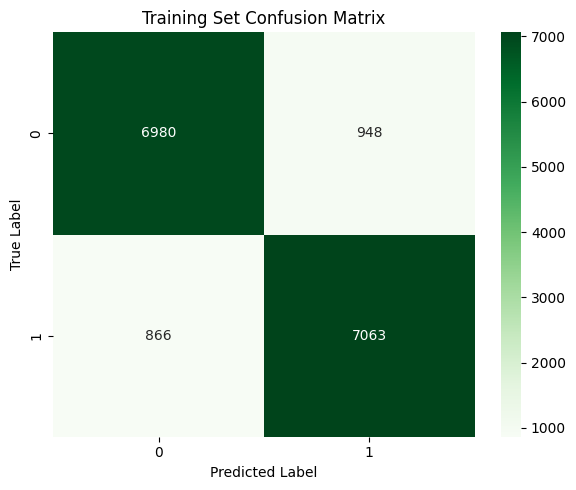


 Classification Report (Test):

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1983
           1       0.83      0.83      0.83      1982

    accuracy                           0.83      3965
   macro avg       0.83      0.83      0.83      3965
weighted avg       0.83      0.83      0.83      3965



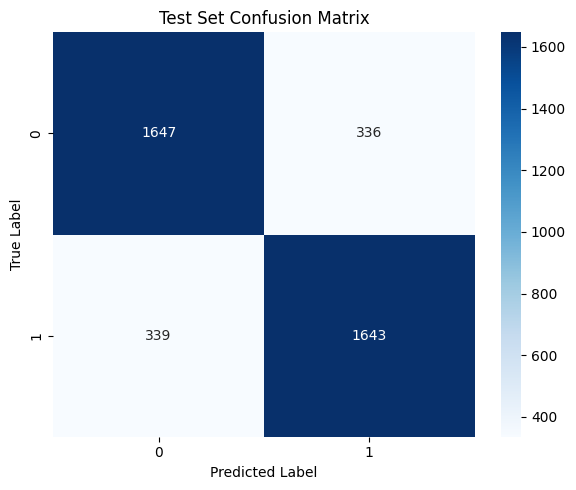

In [ ]:
labels = sorted(df["Encoded_Label"].unique())

y_train_pred = grid.predict(X_train)
print("\n Classification Report (Training):\n")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Training Set Confusion Matrix")
plt.tight_layout()
plt.show()


y_test_pred = grid.predict(X_test)
print("\n Classification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Test Set Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average="weighted")
precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")

print("\nWeighted Metrics (Test Set):")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")



Weighted Metrics (Test Set):
Accuracy : 0.8298
F1 Score : 0.8298
Precision: 0.8298
Recall   : 0.8298
